# Statystyka matematyczna - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu: 2.38 Członkowie: Roksana Jandura , Katarzyna Wesołwoska , Katarzyna Tokarczuk , Magdalena Pogorzelec 

---

# Zestaw zadań 7: Estymacja nieparametryczna

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Dane do zadań

W celu wygenerowania danych wykonaj poniższą komórkę.

In [3]:
# Dane do testów 1
sample = pd.DataFrame(data=np.concatenate([sp.stats.norm.rvs(loc=4, scale=0.2, size=45, random_state=7), sp.stats.norm.rvs(loc=5.5, scale=0.4, size=85, random_state=2159)]), columns=["X"])
sample.head()

,X
0,4.338105
1,3.906813
2,4.006564
3,4.081503
4,3.842215


### Zadanie 1: Histogram [5 pkt]

#### a) Przygotowanie wykresów

Korzystając z funkcji `seaborn.histplot()`przygotuj histogramy częstości zestawu danych zawartego w zmiennej `sample`.

Wykresy zestaw na pojedynczej figurze (2x3 pola na wykres). Przygotowując figurę kieruj się wytycznymi z początku notatnika. Podczas wykonywania kolejnych histogramów:
 - nie ustawiaj żadnych wartość określających podział na przedziały oraz granice przedziałów,
 - ustaw wyłącznie liczbę przedziałów na 20,
 - ustaw wyłącznie szerokość przedziałów na 0.3,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.05,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.15,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.4.
 
Do każdego z wykresów dodaj wizualną reprezentację zestawu danych w postaci zbioru symboli (| lub +) zlokalizowanych poniżej histogramu. Ustaw identyczne zakresy osi dla wszystkich wykresów.

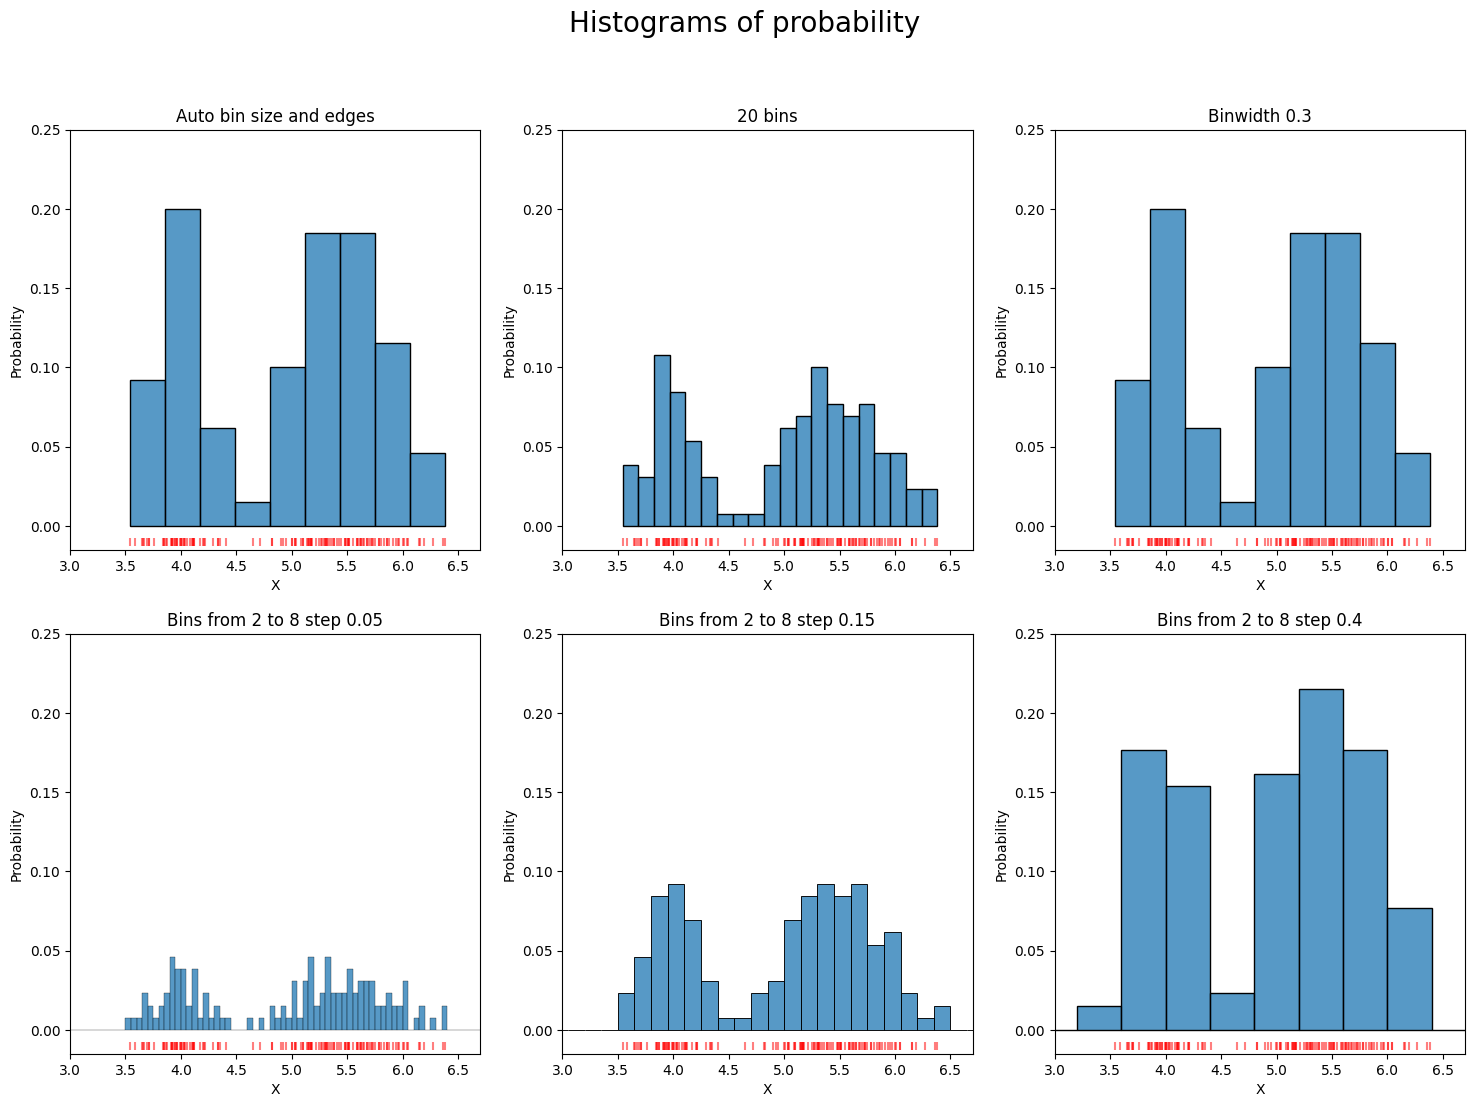

In [4]:
# YOUR CODE HERE
fig, axes = plt.subplots(2, 3, figsize=(18, 12), facecolor='white')
fig.suptitle("Histograms of probability", size=20)
x_min = 3.0
x_max = 6.7
y_min = -0.015
y_max = 0.25

axes[0,0].scatter(sample["X"], np.full_like(sample["X"], -0.01), marker='|', color='red', alpha=0.5) # dodanie zbioru symboli jako wizualna reprezentacja zestawu danych
sns.histplot(sample["X"], ax=axes[0,0], stat="probability")  # histogram częstości zestawu danych
axes[0, 0].set_title('Auto bin size and edges')  #tytuł
axes[0,0].set_xlim(x_min, x_max)  #zakresy osi OX
axes[0,0].set_ylim(y_min, y_max) #zakresy osi OY

        
axes[0,1].scatter(sample["X"], np.full_like(sample["X"], -0.01), marker='|', color='red', alpha=0.5)        
sns.histplot(sample["X"], bins=20, ax=axes[0, 1], stat="probability")
axes[0, 1].set_title('20 bins')
axes[0,1].set_xlim(x_min, x_max)
axes[0,1].set_ylim(y_min, y_max)


axes[0,2].scatter(sample["X"], np.full_like(sample["X"], -0.01), marker='|', color='red', alpha=0.5)        
sns.histplot(sample["X"], binwidth=0.3, ax=axes[0, 2], stat="probability")
axes[0, 2].set_title('Binwidth 0.3')
axes[0,2].set_xlim(x_min, x_max)
axes[0,2].set_ylim(y_min, y_max)


axes[1,0].scatter(sample["X"], np.full_like(sample["X"], -0.01), marker='|', color='red', alpha=0.5)
bins_005 = np.arange(2, 8 + 0.05, 0.05)   # generowanie wartości do krawędzi przedziałów w histogramie
sns.histplot(sample["X"], bins=bins_005, ax=axes[1, 0], stat="probability")
axes[1, 0].set_title('Bins from 2 to 8 step 0.05')
axes[1,0].set_xlim(x_min, x_max)
axes[1,0].set_ylim(y_min, y_max)
        
axes[1,1].scatter(sample["X"], np.full_like(sample["X"], -0.01), marker='|', color='red', alpha=0.5)       
bins_015 = np.arange(2, 8 + 0.15, 0.15)    # generowanie wartości do krawędzi przedziałów w histogramie
sns.histplot(sample["X"], bins=bins_015, ax=axes[1, 1], stat="probability")
axes[1, 1].set_title('Bins from 2 to 8 step 0.15')
axes[1,1].set_xlim(x_min, x_max)
axes[1,1].set_ylim(y_min, y_max)

        
axes[1,2].scatter(sample["X"], np.full_like(sample["X"], -0.01), marker='|', color='red', alpha=0.5)        
bins_04 = np.arange(2, 8 + 0.4, 0.4)     # generowanie wartości do krawędzi przedziałów w histogramie
sns.histplot(sample["X"], bins=bins_04, ax=axes[1, 2], stat="probability")
axes[1, 2].set_title('Bins from 2 to 8 step 0.4')
axes[1,2].set_xlim(x_min, x_max)
axes[1,2].set_ylim(y_min, y_max)


plt.show()

### Zadanie 2: Estymacja funkcją jądrową [16 pkt]

#### a) Estymacji funkcjami jądrowymi od podstaw

Przygotuj funkcję `simple_kde_estimation()`, która będzie dokonywała estymacji nieparametrycznej metodą funkcji jądrowych z wykorzystaniem jądra w postaci rozkładu normalnego o odchyleniu normalnym $\sigma$ zgodnie z informacjami zawartymi w docstring funkcji oraz schematem z załączonego do notatnika zestawu wzorów.

Poza zwracaniem danych określonych w docstring funkcji powinna ona generować wykres zawierający wyestymowaną funkcję (wykres liniowy z wypełnionym polem pod krzywą) oraz dodaną wizualną reprezentacją zestawu danych w postaci zbioru symboli (| lub +) zlokalizowanych poniżej wykresu.

Uwagi do wykonania zadania:
 - Punkty estymacji wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości gęstości prawdopodobieństwa oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.norm`.
 - Przygotowując figurę kieruj się wytycznymi z początku notatnika.

In [9]:
from scipy.stats import norm

def simple_kde_estimation(data, estimation_points, sigma):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i pojedynczą kolumnę "X" z wartościami próby losowej.
    estimation_points: int
        Liczba punktów estymacji funkcji gęstości prawdopodobieństwa.
    sigma: float
        Odchylenie standardowe rozkładu normalnego wykorzystywanego jako jądro funkcji.
    
    Returns
    -------
    cdf: DataFrame
        Tablica zawierająca następujące kolumny:
        X - uszeregowane rosnąco punkty estymacji funkcji gęstości prawdopodobieństwa,
        KDE - wyestymowane wartości funkcji gęstości prawdopodobieństwa.
    """
    # YOUR CODE HERE
    data_x = data['X'].values

    x_min = min(data_x)
    x_max = max(data_x)

    #punkty estymacji
    x = np.linspace(x_min - 3*sigma, x_max + 3*sigma, estimation_points)

    #wartości funkcji gęstości prawdopodobieństwa
    y = np.zeros_like(x)
    for xi in data_x:
        y += norm.pdf(x, xi, sigma)

    #standaryzacja otrzymanych wartości
    y /= np.sum(y) * (x[1] - x[0])

    cdf = pd.DataFrame({'X': x, 'KDE': y})

    # wykres
    plt.plot(x, y, color='blue', label='Wyestymowana funkcja')
    plt.fill_between(x, y, color='blue', alpha=0.2)
    plt.scatter(data_x, np.full_like(data_x, -0.02), marker='|', color='red', label='Zestaw danych')
    plt.xlabel('X')
    plt.ylabel('KDE')
    plt.title('Estymacja funkcjami jądrowymi')
    plt.legend()
    plt.show()

    return cdf

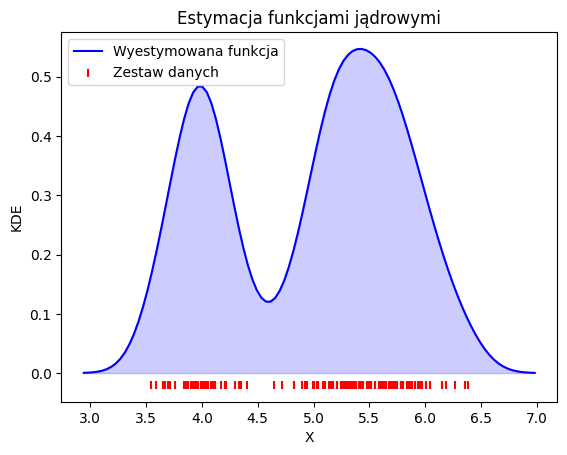

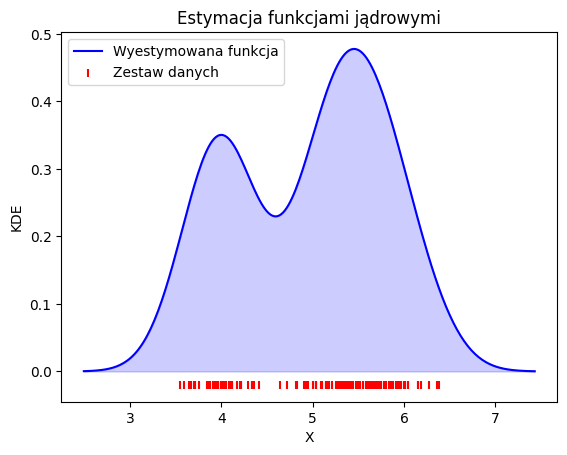

In [10]:
# Komórka testowa
test_results_1 = simple_kde_estimation(sample, estimation_points=100, sigma=0.2)
assert type(test_results_1) == pd.DataFrame
assert test_results_1.shape == (100, 2)
assert list(test_results_1.columns) == ['X', 'KDE']
assert np.all(np.isclose(test_results_1.min().values, [2.94233698e+00, 3.32813073e-04]))
assert np.all(np.isclose(test_results_1.max().values, [6.98176057, 0.54688772]))
assert np.all(np.isclose(test_results_1.mean().values, [4.96204877, 0.24508447]))

test_results_2 = simple_kde_estimation(sample, estimation_points=250, sigma=0.35)
assert type(test_results_2) == pd.DataFrame
assert test_results_2.shape == (250, 2)
assert list(test_results_2.columns) == ['X', 'KDE']
assert np.all(np.isclose(test_results_2.min().values, [2.49233698e+00, 2.69768435e-04]))
assert np.all(np.isclose(test_results_2.max().values, [7.43176057, 0.47782523]))
assert np.all(np.isclose(test_results_2.mean().values, [4.96204877, 0.20164296]))

#### b) Dedykowane funkcje

Korzystając z klasy `KernelDensity` wchodzącej w skład pakietu scikit-learn dokonaj estymymacji rozkładu zestawu danych zawartego w zmiennej `sample`.

Wyniki estymacji przedstaw w postaci wykresów zawierających wyestymowaną funkcję (wykres liniowy z wypełnionym polem pod krzywą) oraz dodaną wizualną reprezentacją zestawu danych w postaci pionowych kresek zlokalizowanych poniżej wykresu.

Wykresy zestaw na dwóch figurach (2x3 pola na wykres). Przygotowując figury kieruj się wytycznymi z początku notatnika. Podczas wykonywania wykresów:
 - Figura 1:
     - na każdym z wykresów przedstaw wynik estymacji z wykorzystaniem innego jądra funkcji,
     - ustaw wartość parametru odpowiadającego za szerokość jądra funkcji na 0.1,
     - ustaw identyczne zakresy osi dla wszystkich wykresów.
 - Figura 2:
     - na każdym z wykresów przedstaw wynik estymacji z wykorzystaniem innego jądra funkcji,
     - ustaw wartość parametru odpowiadającego za szerokość jądra funkcji tak, aby wynik pracy funkcji dobrze oddawał charakter rozkładu populacji z której została pobrana próba losowa,
     - ustaw identyczne zakresy osi dla wszystkich wykresów. 

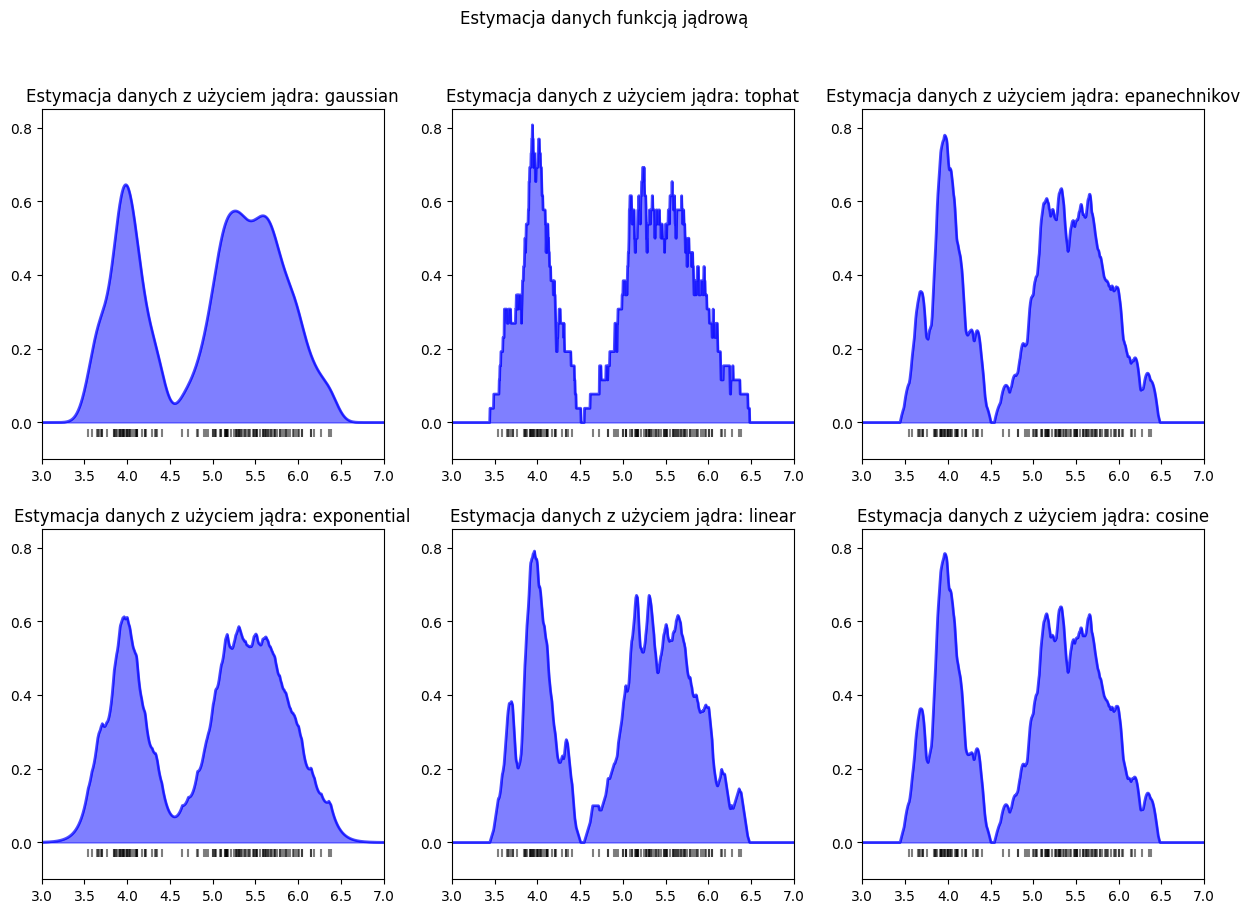

In [12]:
# Figura 1
# YOUR CODE HERE
#x_min = sample.min().values[0]-1
#x_max = sample.max().values[0]+1
x_min=3
x_max = 7
fig, axes = plt.subplots(2, 3, figsize=(15, 10),facecolor="white")
fig.suptitle("Estymacja danych funkcją jądrową")


kde_1=KernelDensity(kernel='gaussian', bandwidth=0.1).fit(sample.values)
x_vals_1 = np.linspace(x_min, x_max, 1000)
log_dens_1 = kde_1.score_samples(x_vals_1.reshape(-1,1))
dens_1 = np.exp(log_dens_1)
axes[0, 0].plot(x_vals_1, dens_1, color='blue', alpha=0.7, linewidth=2)
axes[0, 0].fill_between(x_vals_1, dens_1, color='blue', alpha=0.5)
axes[0, 0].scatter(sample["X"], np.full_like(sample["X"], -0.03), marker='|', color='black', alpha=0.5)
axes[0, 0].set_title("Estymacja danych z użyciem jądra: gaussian")


kde_2=KernelDensity(kernel='tophat', bandwidth=0.1).fit(sample.values)
x_vals_2 = np.linspace(x_min, x_max, 1000)
log_dens_2 = kde_2.score_samples(x_vals_2.reshape(-1,1))
dens_2 = np.exp(log_dens_2)
axes[0, 1].plot(x_vals_2, dens_2, color='blue', alpha=0.7, linewidth=2)
axes[0, 1].fill_between(x_vals_2, dens_2, color='blue', alpha=0.5)
axes[0, 1].scatter(sample["X"], np.full_like(sample["X"], -0.03), marker='|', color='black', alpha=0.5)
axes[0, 1].set_title("Estymacja danych z użyciem jądra: tophat")



kde_3=KernelDensity(kernel='epanechnikov', bandwidth=0.1).fit(sample.values)
x_vals_3 = np.linspace(x_min, x_max, 1000)
log_dens_3 = kde_3.score_samples(x_vals_3.reshape(-1,1))
dens_3 = np.exp(log_dens_3)
axes[0, 2].plot(x_vals_3, dens_3, color='blue', alpha=0.7, linewidth=2)
axes[0, 2].fill_between(x_vals_3, dens_3, color='blue', alpha=0.5)
axes[0, 2].scatter(sample["X"], np.full_like(sample["X"], -0.03), marker='|', color='black', alpha=0.5)
axes[0, 2].set_title("Estymacja danych z użyciem jądra: epanechnikov")



kde_4=KernelDensity(kernel='exponential', bandwidth=0.1).fit(sample.values)
x_vals_4 = np.linspace(x_min, x_max, 1000)
log_dens_4 = kde_4.score_samples(x_vals_4.reshape(-1,1))
dens_4 = np.exp(log_dens_4)
axes[1, 0].plot(x_vals_4, dens_4, color='blue', alpha=0.7, linewidth=2)
axes[1, 0].fill_between(x_vals_4, dens_4, color='blue', alpha=0.5)
axes[1, 0].scatter(sample["X"], np.full_like(sample["X"], -0.03), marker='|', color='black', alpha=0.5)
axes[1, 0].set_title("Estymacja danych z użyciem jądra: exponential")

kde_5=KernelDensity(kernel='linear', bandwidth=0.1).fit(sample.values)
x_vals_5 = np.linspace(x_min, x_max, 1000)
log_dens_5 = kde_5.score_samples(x_vals_5.reshape(-1,1))
dens_5 = np.exp(log_dens_5)
axes[1, 1].plot(x_vals_5, dens_5, color='blue', alpha=0.7, linewidth=2)
axes[1, 1].fill_between(x_vals_5, dens_5, color='blue', alpha=0.5)
axes[1, 1].scatter(sample["X"], np.full_like(sample["X"], -0.03), marker='|', color='black', alpha=0.5)
axes[1, 1].set_title("Estymacja danych z użyciem jądra: linear")


kde_6=KernelDensity(kernel='cosine', bandwidth=0.1).fit(sample.values)
x_vals_6 = np.linspace(x_min, x_max, 1000)
log_dens = kde_6.score_samples(x_vals_6.reshape(-1,1))
dens_6 = np.exp(log_dens)
axes[1, 2].plot(x_vals_6, dens_6, color='blue', alpha=0.7, linewidth=2)
axes[1, 2].fill_between(x_vals_6, dens_6, color='blue', alpha=0.5)
axes[1, 2].scatter(sample["X"], np.full_like(sample["X"], -0.03), marker='|', color='black', alpha=0.5)
axes[1, 2].set_title("Estymacja danych z użyciem jądra: cosine")

for i in range(2):
    for j in range(3):
        axes[i, j].set_xlim([x_min, x_max])
        axes[i, j].set_ylim([-0.1,0.85])


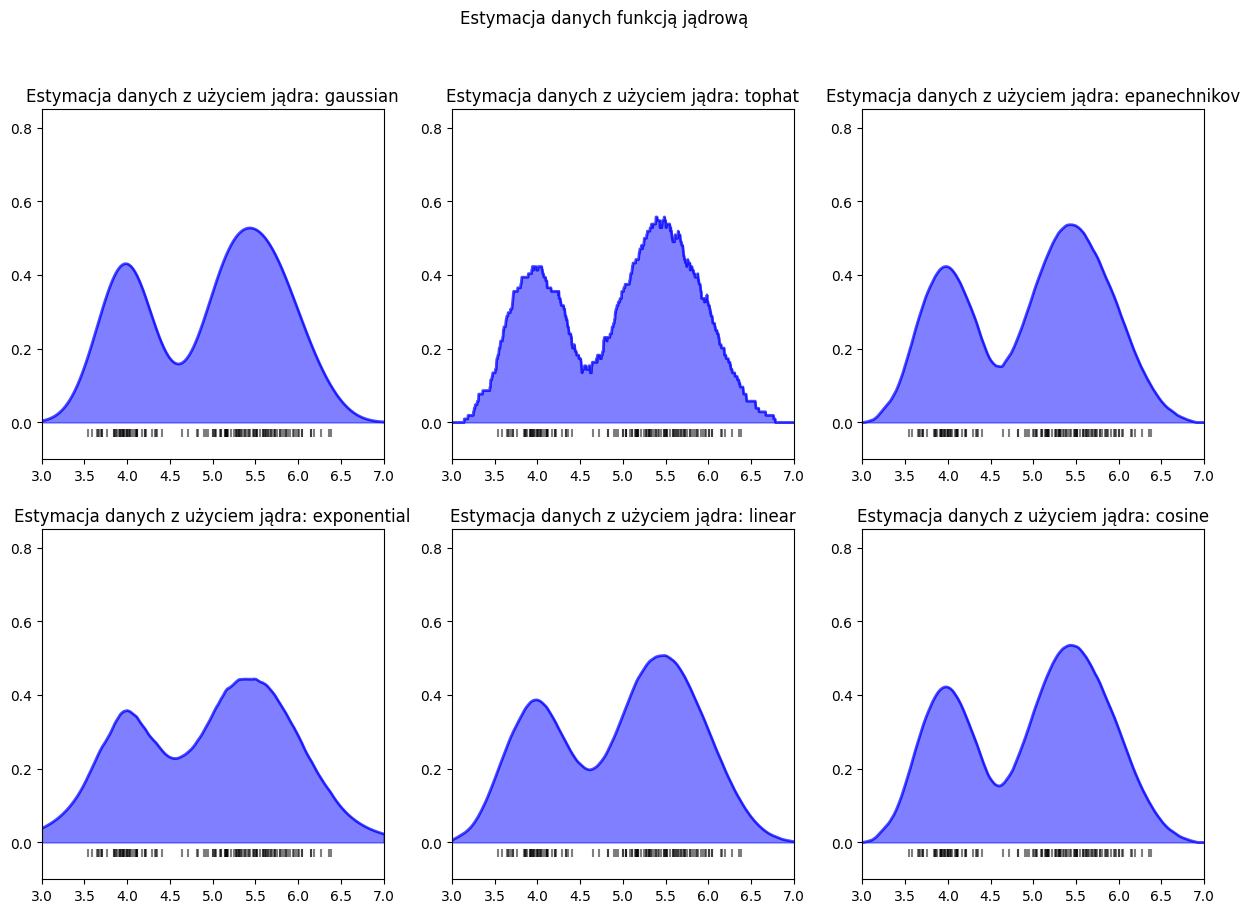

In [8]:
# Figura 2
# YOUR CODE HERE
#x_min = sample.min().values[0]
x_min=3
x_max = 7
fig, axes = plt.subplots(2, 3, figsize=(15, 10),facecolor="white")
fig.suptitle("Estymacja danych funkcją jądrową")


kde_1=KernelDensity(kernel='gaussian', bandwidth=0.25).fit(sample.values)
x_vals_1 = np.linspace(x_min, x_max, 1000)
log_dens_1 = kde_1.score_samples(x_vals_1.reshape(-1,1))
dens_1 = np.exp(log_dens_1)
axes[0, 0].plot(x_vals_1, dens_1, color='blue', alpha=0.7, linewidth=2)
axes[0, 0].fill_between(x_vals_1, dens_1, color='blue', alpha=0.5)
axes[0, 0].scatter(sample["X"], np.full_like(sample["X"], -0.03), marker='|', color='black', alpha=0.5) 
axes[0, 0].set_title("Estymacja danych z użyciem jądra: gaussian")


kde_2=KernelDensity(kernel='tophat', bandwidth=0.4).fit(sample.values)
x_vals_2 = np.linspace(x_min, x_max, 1000)
log_dens_2 = kde_2.score_samples(x_vals_2.reshape(-1,1))
dens_2 = np.exp(log_dens_2)
axes[0, 1].plot(x_vals_2, dens_2, color='blue', alpha=0.7, linewidth=2)
axes[0, 1].fill_between(x_vals_2, dens_2, color='blue', alpha=0.5)
axes[0, 1].scatter(sample["X"], np.full_like(sample["X"], -0.03), marker='|', color='black', alpha=0.5)
axes[0, 1].set_title("Estymacja danych z użyciem jądra: tophat")



kde_3=KernelDensity(kernel='epanechnikov', bandwidth=0.53).fit(sample.values)
x_vals_3 = np.linspace(x_min, x_max, 1000)
log_dens_3 = kde_3.score_samples(x_vals_3.reshape(-1,1))
dens_3 = np.exp(log_dens_3)
axes[0, 2].plot(x_vals_3, dens_3, color='blue', alpha=0.7, linewidth=2)
axes[0, 2].fill_between(x_vals_3, dens_3, color='blue', alpha=0.5)
axes[0, 2].scatter(sample["X"], np.full_like(sample["X"], -0.03), marker='|', color='black', alpha=0.5)
axes[0, 2].set_title("Estymacja danych z użyciem jądra: epanechnikov")



kde_4=KernelDensity(kernel='exponential', bandwidth=0.35).fit(sample.values)
x_vals_4 = np.linspace(x_min, x_max, 1000)
log_dens_4 = kde_4.score_samples(x_vals_4.reshape(-1,1))
dens_4 = np.exp(log_dens_4)
axes[1, 0].plot(x_vals_4, dens_4, color='blue', alpha=0.7, linewidth=2)
axes[1, 0].fill_between(x_vals_4, dens_4, color='blue', alpha=0.5)
axes[1, 0].scatter(sample["X"], np.full_like(sample["X"], -0.03), marker='|', color='black', alpha=0.5)
axes[1, 0].set_title("Estymacja danych z użyciem jądra: exponential")

kde_5=KernelDensity(kernel='linear', bandwidth=0.7).fit(sample.values)
x_vals_5 = np.linspace(x_min, x_max, 1000)
log_dens_5 = kde_5.score_samples(x_vals_5.reshape(-1,1))
dens_5 = np.exp(log_dens_5)
axes[1, 1].plot(x_vals_5, dens_5, color='blue', alpha=0.7, linewidth=2)
axes[1, 1].fill_between(x_vals_5, dens_5, color='blue', alpha=0.5)
axes[1, 1].scatter(sample["X"], np.full_like(sample["X"], -0.03), marker='|', color='black', alpha=0.5)
axes[1, 1].set_title("Estymacja danych z użyciem jądra: linear")


kde_6=KernelDensity(kernel='cosine', bandwidth=0.55).fit(sample.values)
x_vals_6 = np.linspace(x_min, x_max, 1000)
log_dens = kde_6.score_samples(x_vals_6.reshape(-1,1))
dens_6 = np.exp(log_dens)
axes[1, 2].plot(x_vals_6, dens_6, color='blue', alpha=0.7, linewidth=2)
axes[1, 2].fill_between(x_vals_6, dens_6, color='blue', alpha=0.5)
axes[1, 2].scatter(sample["X"], np.full_like(sample["X"], -0.03), marker='|', color='black', alpha=0.5)
axes[1, 2].set_title("Estymacja danych z użyciem jądra: cosine")

for i in range(2):
    for j in range(3):
        axes[i, j].set_xlim([x_min, x_max])
        axes[i, j].set_ylim([-0.1,0.85])



### Zadanie 3: Dyskusja wyników [6 pkt]

Przygotowane w poprzednich zadaniach wykresy są wizualną reprezentacją tego samego zestawu danych, dobór metody oraz jej parametrów sparawia jednak, że nie wyglądają one identycznie.

Przedyskutuj plusy i minusy obu metod oraz odpowiedz na pytanie w jaki sposób dobór parametrów funkcji (liczba, szerokość i położenie granic przedziałów, wykorzystana wersja oraz szerokość jadra) wpływa na poprawność i czytelność wyniku.

Plusy i minusy obu metod:

Histogram

Plusy:
- zrozumiały do interpretacji
- prosta implementacja
- dostosowywanie liczby przedziałów

Minusy:
- nieodpowiednie dobranie liczby przedziałów może zaburzyć prawidłową interpretację danych
- mniej intuicyjny

Jądrowy estymator gęstości:

Plusy:
- pozwala uzyskać gładki wykres przez co łatwiej zauważyć różne trendy
- może lepiej odzwierciedlać rozkład danych od histogramu

Minusy:
- należy odpowiednio dobierać szerokość jądra, gdyż można doprowadzić do różnych interpretacji danych
- jest "wrażliwy" na dobrane parametry
- wymaga bardziej złożonych obliczeń

W jaki sposób dobór parametrów wpływa na poprawność i czytelność wyniku?
- im większa liczba przedziałów w histogramie tym mamy większą dokładność, ale mogą się pojawić fałszywe wzorce
- im mniejsza liczba przedziałów w histogramie tym łatwiej możemy stracić niektóre dane 
- im węższe słupki tym cięższy w odczytaniu i zrozumieniu histogram- zbyt duża dokładność
- za to zbyt szerokie słupki sprawiają że histogram jest zbyt wygładzony-możemy utracić niektóre dane
- wybór jądra ma wpływ na poziom wygładzenia wykresu; gaussian daje najbardziej głądką i ciągłą estymacje, tophat za to nie wygładza nam danych-zachowuje lokalne właściwości
- szerokość jądra określa nam kształt wygłądzonego wykresu;
- zbyt małe wartości szerokości pokazują nam wiele małych szczytów i dolin blisko siebie co pogarsza nam czytelność wykresu
- zbyt duże wartości szerokości powoduje "zatracenie" danych, zbyt duże wygładzenie wykresu, co nie oddaje prawdziwej struktury danych,

### Zadanie 4: Estymacja na podstawie dystybuanty [8 pkt]

Przygotuj funkcję `cdf_estimation()`, która będzie dokonywała estymacji dystrybuanty rozkładu w oparciu o dystrybuantę empiryczną oraz statystykę wyznaczaną z rozkładu Kołmogorowa-Smirnowa zgodnie z informacjami zawartymi w docstring funkcji oraz schematem z załączonego do notatnika zestawu wzorów.

Poza zwracaniem danych określonych w docstring funkcji powinna ona generować wykres liniowy dystrybuanty empirycznej z zaznaczonym przedziałem ufności oraz tytułem figury `Przedział ufności dystrybuanty rozkładu na poziomie istotności 1-alpha=A`, gdzie wartość A jest uzupełnianie na podstawie wartości argumentu `alpha`.

Uwagi do wykonania zadania:
 - Wartości statystyki testowej oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.kstwo`.

In [20]:
#data to wartosci X proby losowej
#alpha to wartosc okreslajaca poziom istotnosci
#funkcja ma zwrócić tablice zawierającą następujące kolumny:
        #X - uszeregowane rosnąco wartości próby losowej,
        #F_d - wartości dystrybuanty empirycznej,
        #F_d_min - dolna granica przedziału ufności,
        #F_d_max - górna granica przedziału ufności.
def cdf_estimation(data, alpha):
    sort = data.sort_values(by='X') #posrtowane dane
    n = len(sort) #liczba obserwacji
    ecdf = np.arange(1, n + 1) / n #dystrybuanrta empiryczna, iloraz numerów kolejnych obserwacji/ całkowitą ilość 
    #w ten sposob generujemy czestotliwosc kumulacyjna 
    sort['F_d'] = ecdf
    
    #statystyka z rozkładu Kołmogorowa-Smirnowa
    statistic= sp.stats.kstwo.ppf(1 - alpha, n)
    
    #granice
    sort['F_d_min'] = np.maximum(ecdf - statistic, 0) #od 0 do roznicy
    sort['F_d_max'] = np.minimum(ecdf + statistic, 1) #od sumy do 1

   #Wykres
    plt.step(sort['X'], ecdf, where='post', label='Dystrybuanta empiryczna') #generowanie, kroki dystrybuanty empirycznej
    plt.fill_between(sort['X'], sort['F_d_min'], sort['F_d_max'], step='post', color='gray', alpha=0.2,
                     label='Przedział ufności')  #wypełnia obszar między granicami ufności
    plt.title(f'Przedział ufności dystrybuanty rozkładu na poziomie istotności 1-alpha={1-alpha:.2f}')
    plt.xlabel('Wartość')
    plt.ylabel('Dystrybuanta')
    plt.legend()
    plt.show()

#zwracamy posortowane wartości próbki losowej, wartości ecdf oraz granice przedziału ufności
    return sort[['X', 'F_d', 'F_d_min', 'F_d_max']]

#Użycie
#test_results_3 = cdf_estimation(sample, 0.05)
#print(test_results_3)

#test_results_4 = cdf_estimation(sample, 0.02)
#print(test_results_4)

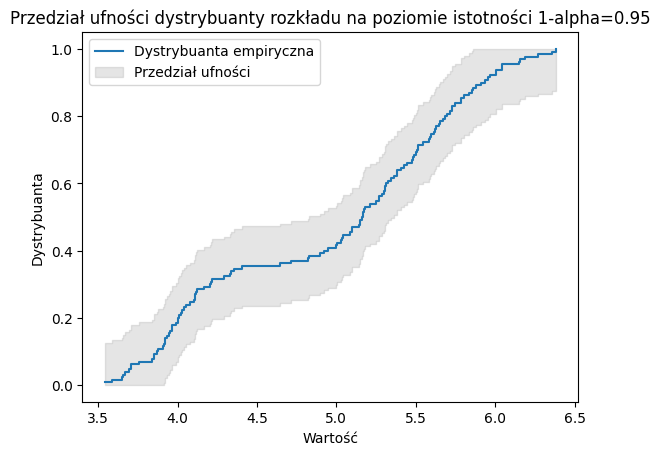

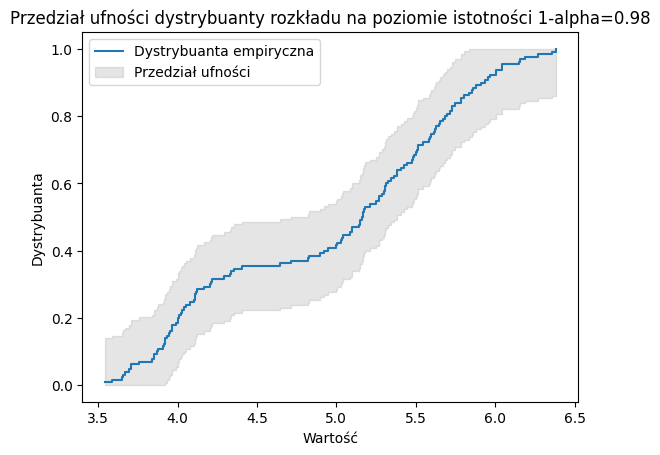

In [21]:
# Komórka testowa
test_results_3 = cdf_estimation(sample, 0.05)
assert type(test_results_3) == pd.DataFrame
assert test_results_3.shape == (130, 4)
assert list(test_results_3.columns) == ['X', 'F_d', 'F_d_min', 'F_d_max']
assert np.all(np.isclose(test_results_3.min().values, [3.54233698, 0.00769231, 0., 0.12544548]))
assert np.all(np.isclose(test_results_3.max().values, [6.38176057, 1., 0.88224683, 1.]))
assert np.all(np.isclose(test_results_3.mean().values, [4.9551826 , 0.50384615, 0.3925793 , 0.61420722]))

test_results_4 = cdf_estimation(sample, 0.02)
assert type(test_results_4) == pd.DataFrame
assert test_results_4.shape == (130, 4)
assert list(test_results_4.columns) == ['X', 'F_d', 'F_d_min', 'F_d_max']
assert np.all(np.isclose(test_results_4.min().values, [3.54233698, 0.00769231, 0., 0.13935689]))
assert np.all(np.isclose(test_results_4.max().values, [6.38176057, 1., 0.86833542, 1.]))
assert np.all(np.isclose(test_results_4.mean().values, [4.9551826 , 0.50384615, 0.380346, 0.62633351]))